In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows=100
pd.options.display.max_columns=26


In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')

### EDA

In [3]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
#null value check
for feature in df.columns:
    print(f"{feature} has {df[feature].isnull().mean()} percent null values")

car_ID has 0.0 percent null values
symboling has 0.0 percent null values
CarName has 0.0 percent null values
fueltype has 0.0 percent null values
aspiration has 0.0 percent null values
doornumber has 0.0 percent null values
carbody has 0.0 percent null values
drivewheel has 0.0 percent null values
enginelocation has 0.0 percent null values
wheelbase has 0.0 percent null values
carlength has 0.0 percent null values
carwidth has 0.0 percent null values
carheight has 0.0 percent null values
curbweight has 0.0 percent null values
enginetype has 0.0 percent null values
cylindernumber has 0.0 percent null values
enginesize has 0.0 percent null values
fuelsystem has 0.0 percent null values
boreratio has 0.0 percent null values
stroke has 0.0 percent null values
compressionratio has 0.0 percent null values
horsepower has 0.0 percent null values
peakrpm has 0.0 percent null values
citympg has 0.0 percent null values
highwaympg has 0.0 percent null values
price has 0.0 percent null values


In [7]:
#seperate categorical & numerical feature
categorical= [feature for feature in df.columns if df[feature].dtypes=='O']
print(f"There are {len(categorical)} features in data and these are:")
print(categorical)

There are 10 features in data and these are:
['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [8]:
#unique values
for feature in categorical:
    print(f'{feature} has {len(df[feature].unique())} labels')

CarName has 147 labels
fueltype has 2 labels
aspiration has 2 labels
doornumber has 2 labels
carbody has 5 labels
drivewheel has 3 labels
enginelocation has 2 labels
enginetype has 7 labels
cylindernumber has 7 labels
fuelsystem has 8 labels


In [9]:
#value counts:
df['CarName'].value_counts().head(12)

toyota corolla          6
peugeot 504             6
toyota corona           6
subaru dl               4
mitsubishi g4           3
mitsubishi outlander    3
mazda 626               3
mitsubishi mirage g4    3
honda civic             3
toyota mark ii          3
toyota starlet          2
volvo 145e (sw)         2
Name: CarName, dtype: int64

<AxesSubplot:xlabel='CarName'>

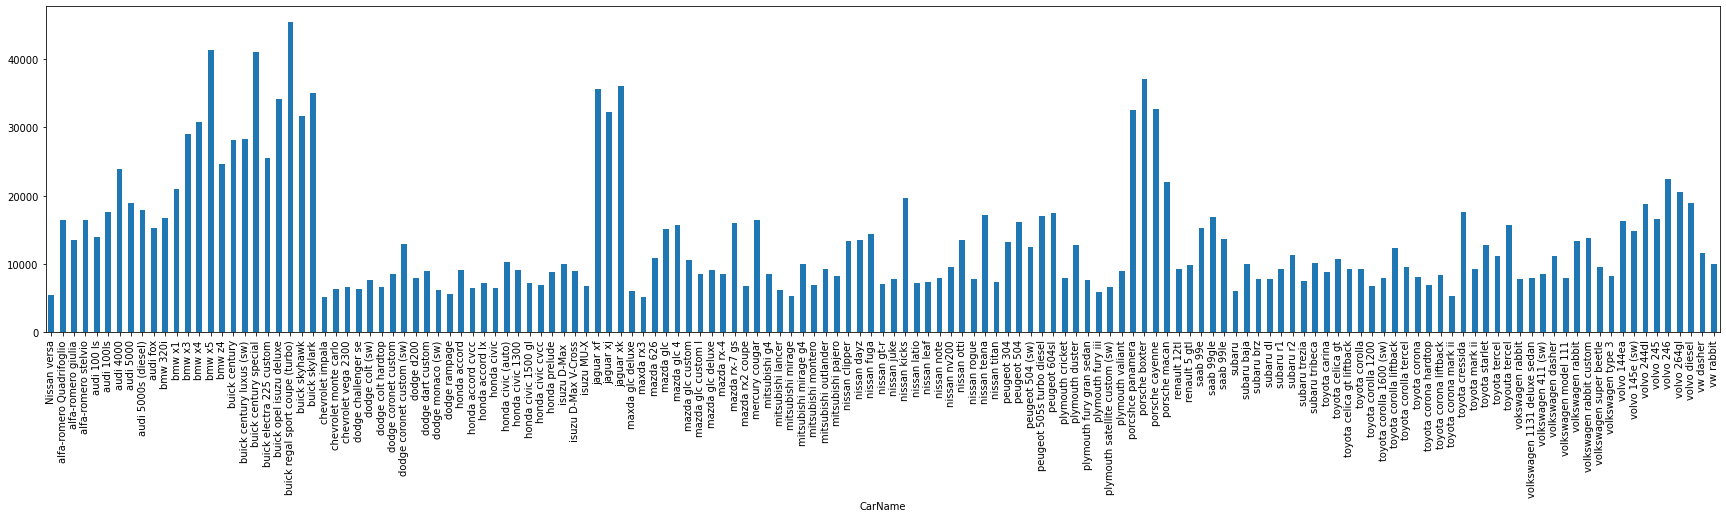

In [10]:
plt.figure(figsize=(30,6))
df.groupby(['CarName'])['price'].median().plot.bar()

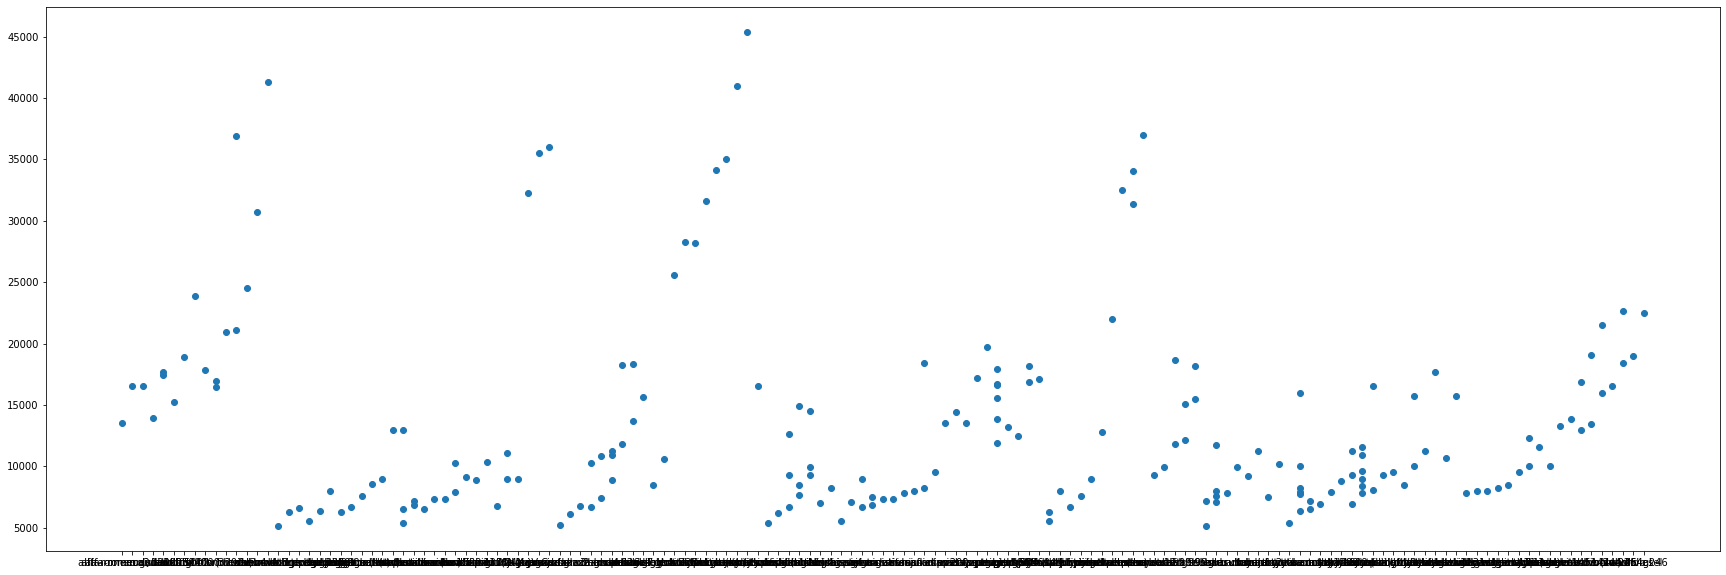

In [11]:
plt.figure(figsize=(30,10))
plt.scatter(x=df['CarName'],y=df['price'])

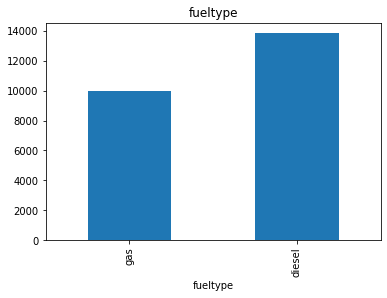

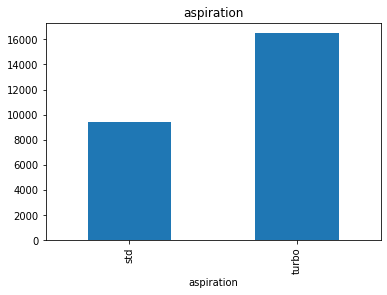

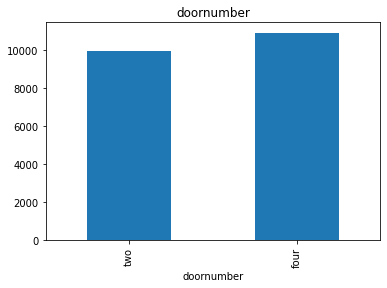

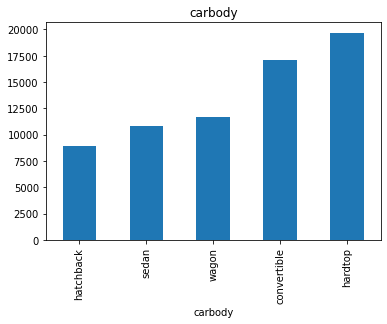

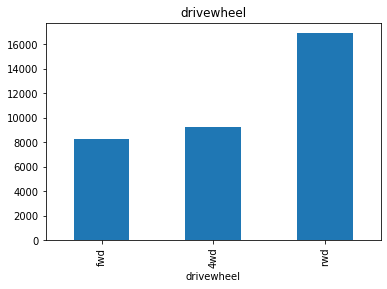

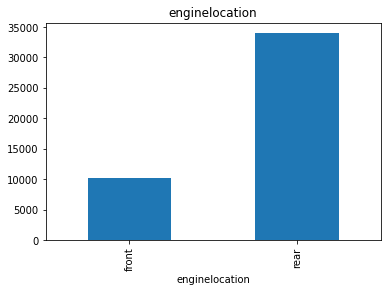

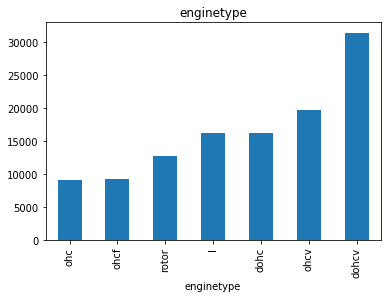

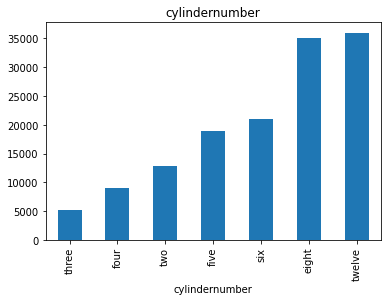

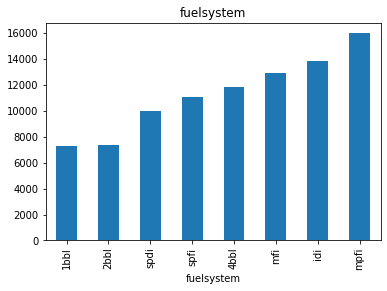

In [12]:
for feature in categorical:
    if feature == 'CarName':
        pass
    else:
        df.groupby(feature)['price'].median().sort_values().plot.bar()
        plt.title(feature)
        plt.show()
    

In [13]:
numerical= [feature for feature in df.columns if df[feature].dtypes!='O']
print(f"There are {len(numerical)} features in data and these are:")
print(numerical)

There are 16 features in data and these are:
['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [14]:
#discrete & continous feature split

discrete_feature=[feature for feature in numerical if len(df[feature].unique())<25 and feature not in ['car_ID']]
continous_feature=[feature for feature in numerical if len(df[feature].unique())>25 and feature not in ['car_ID']]



In [15]:
print("discrete_feature are")
print(discrete_feature)
print("continous_feature are")
print(continous_feature)


discrete_feature are
['symboling', 'peakrpm']
continous_feature are
['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'citympg', 'highwaympg', 'price']


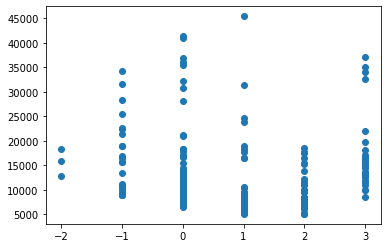

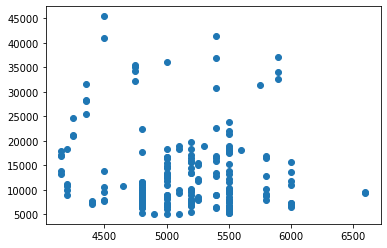

In [16]:
# Discrete feature
for feature in discrete_feature:
    plt.scatter(x=df[feature],y=df['price'])
    plt.show()
    

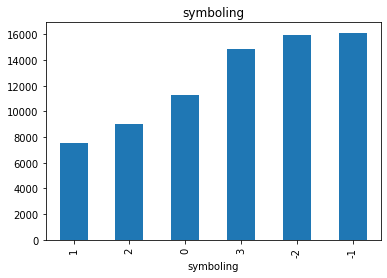

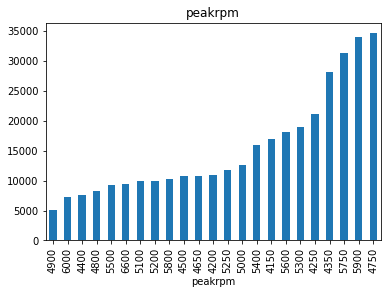

In [17]:
for feature in discrete_feature:
    df.groupby(feature)['price'].median().sort_values().plot.bar()
    plt.title(feature)
    plt.show()

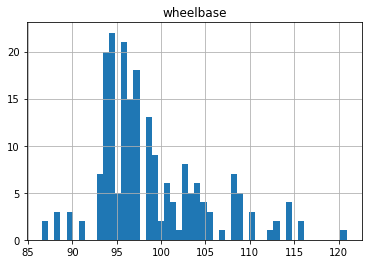

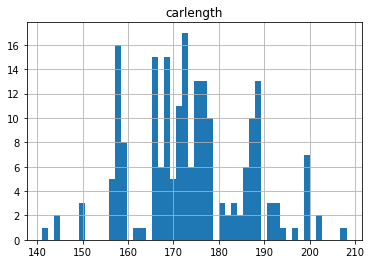

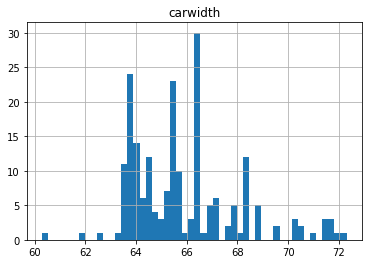

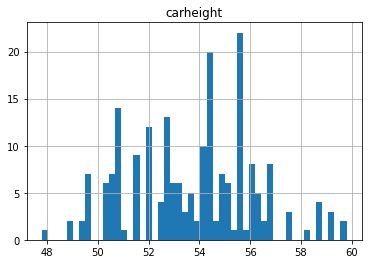

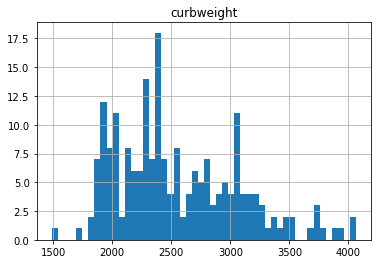

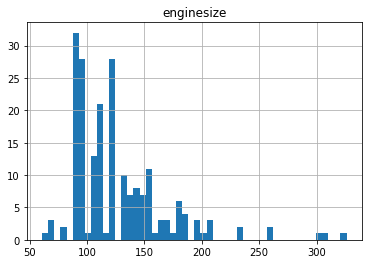

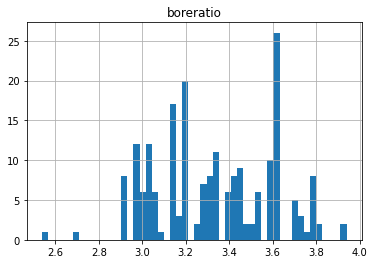

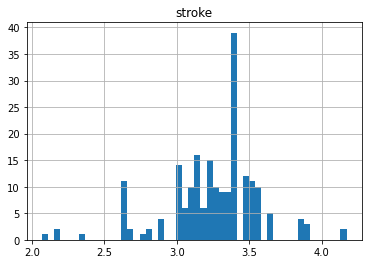

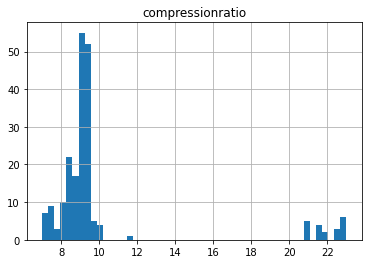

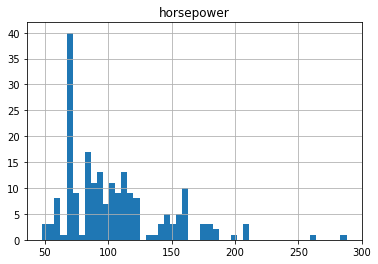

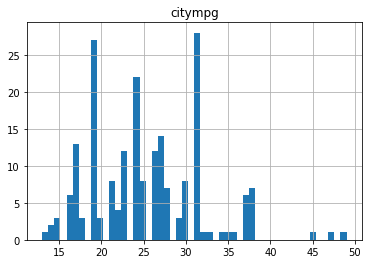

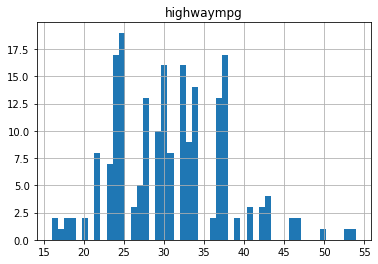

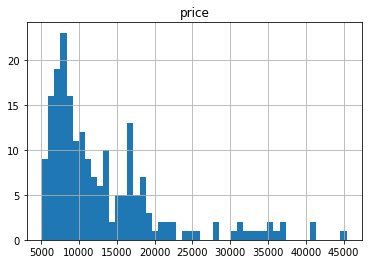

In [18]:
for feature in continous_feature:
    df[feature].hist(bins=50)
    plt.title(feature)
    plt.show()

Some data are skewed and not gaussian normallized distributed

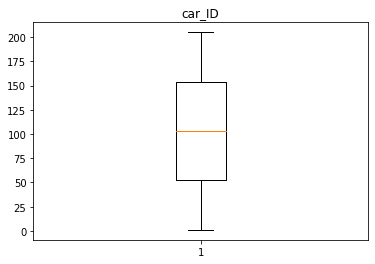

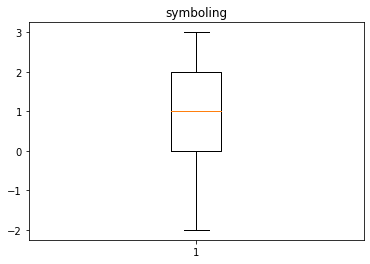

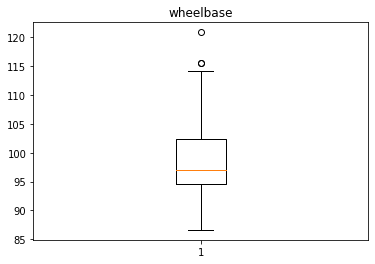

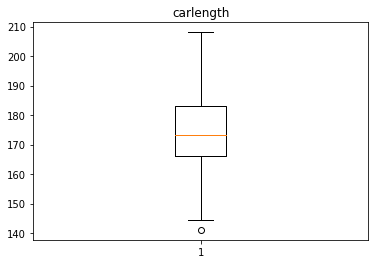

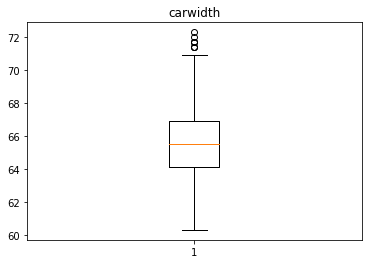

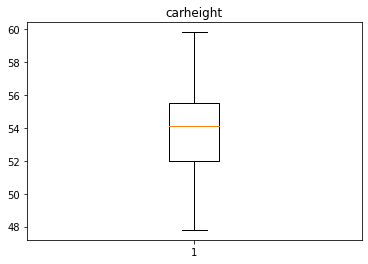

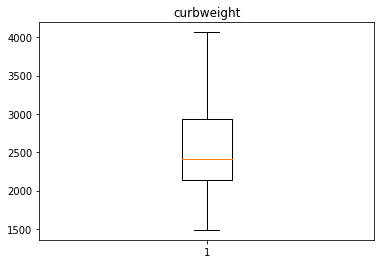

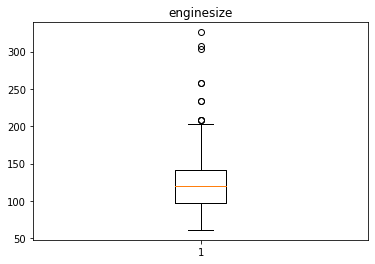

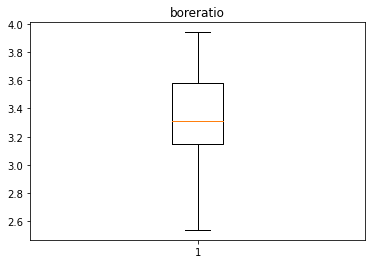

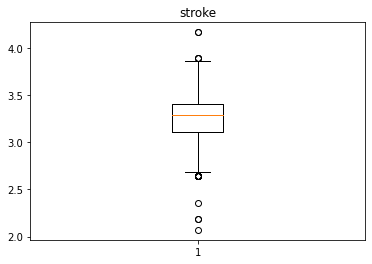

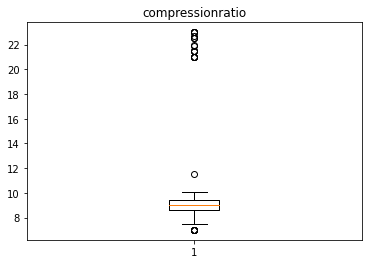

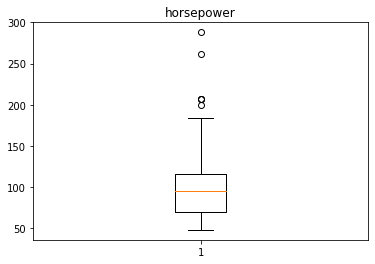

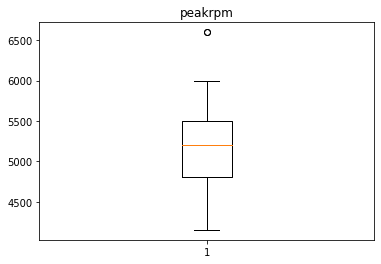

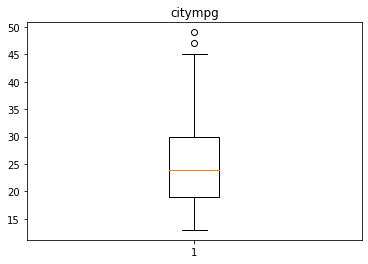

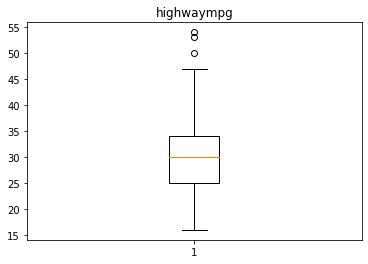

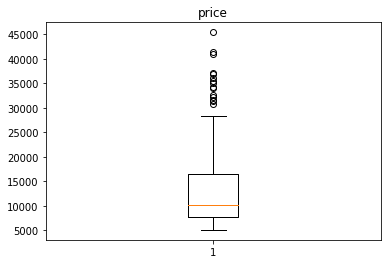

In [19]:
#checking for outliers
for feature in numerical:
    plt.boxplot(x=df[feature])
    plt.title(feature)
    plt.show()

wheelbase,carwidth,enginesize,stroke,compression ratio,horsepower,peakrpm,citympg,highwaympg,price has outliers

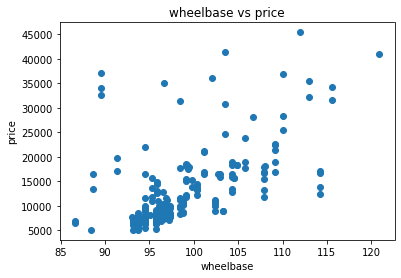

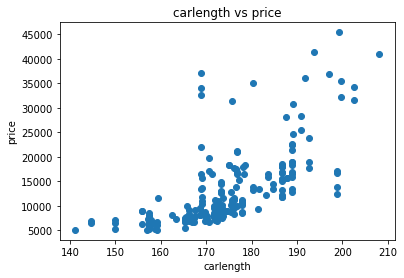

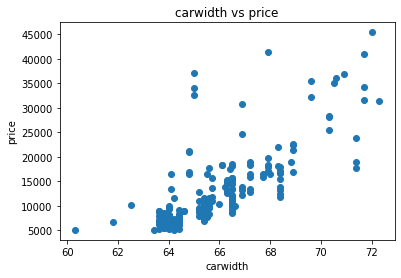

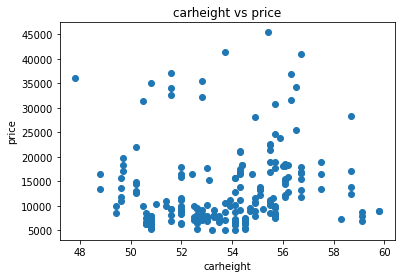

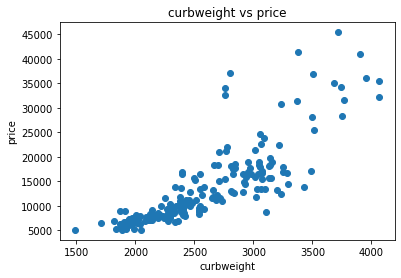

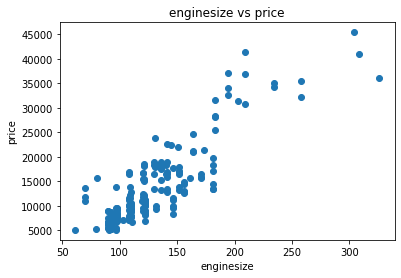

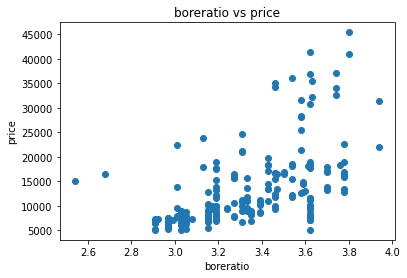

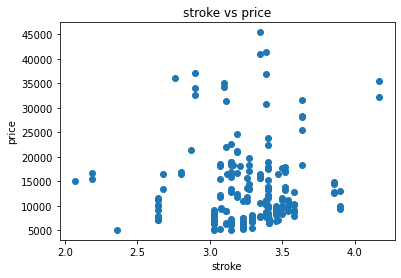

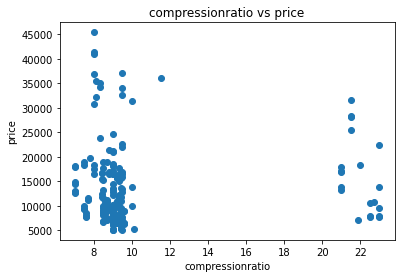

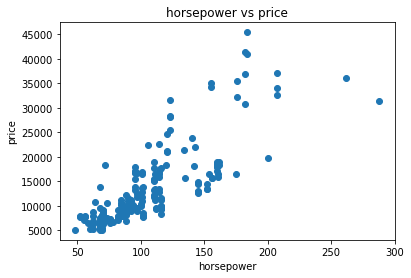

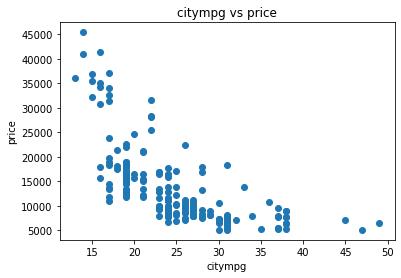

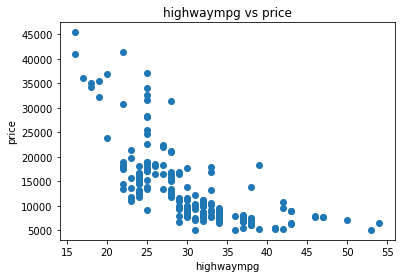

In [20]:
#effect of continous feature on price

for feature in continous_feature:
    if feature=='price':
        pass
    else:
        plt.scatter(x=df[feature],y=df['price'])
        plt.xlabel(feature)
        plt.ylabel('price')
        plt.title(f"{feature} vs price")
        plt.show()
    

In [21]:
    
#Q-Q plot

import scipy.stats as stat
import pylab
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist(bins=20)
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()

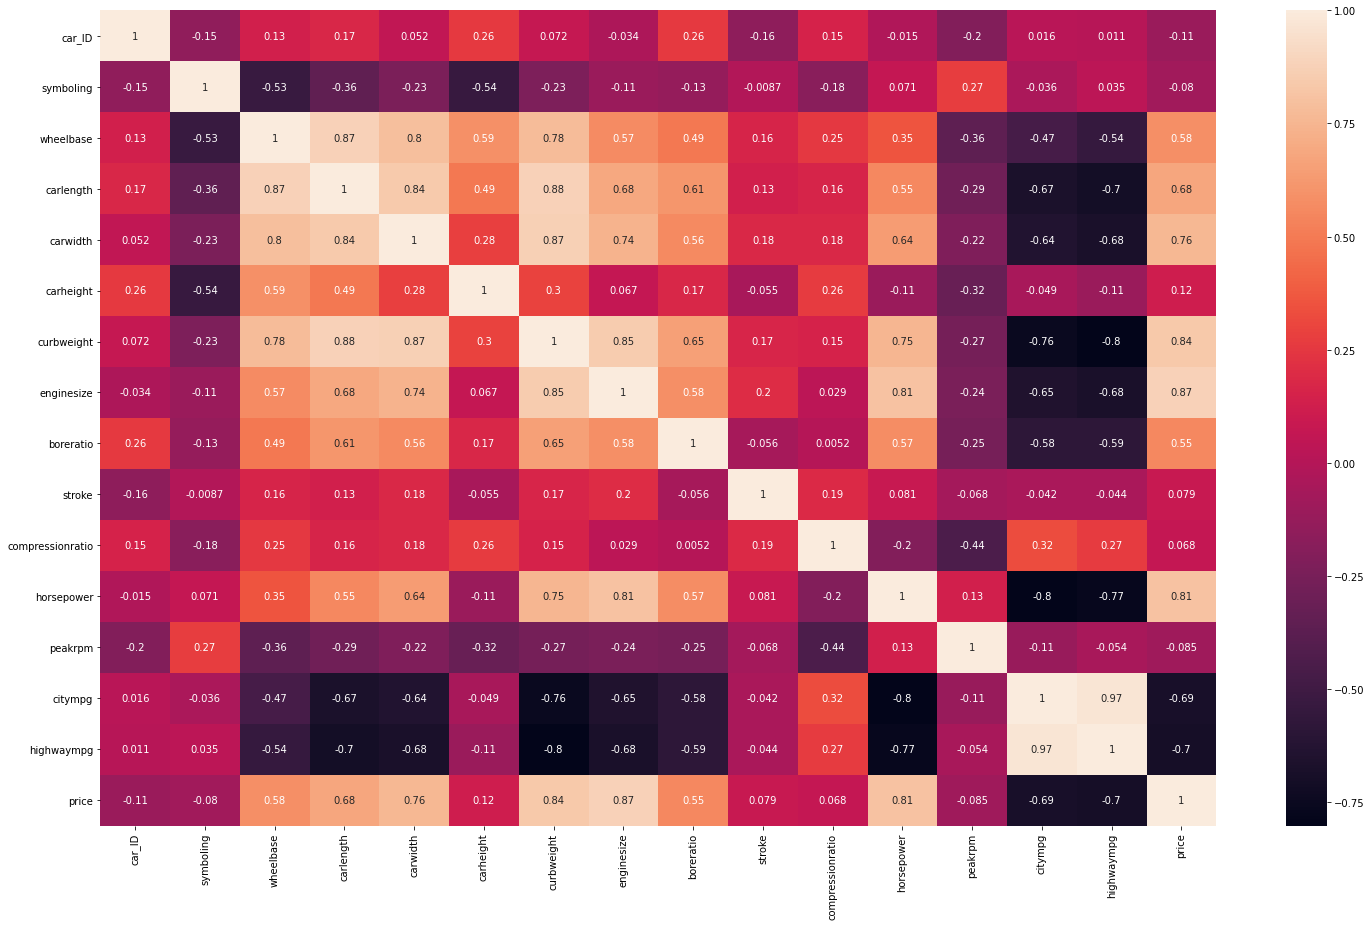

In [22]:
# checking correlation
import seaborn as sns
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### Conclusions from correlation heatmap
1. citympg,highway mpg has high correlation of( 0.97% ) we can drop one of them feature
2. price has high positive correlation with features(carwidth,carlenth,curbweight,enginesize,horepower)makes      them important feature
3. with stroke ,compression ratio minute correlation(0.079,0.068)we can drop it

### Feature Engineering

#### Handling categoriacal feature 
1. LABEL ENCODING : ONE HOT ENCODING

In [23]:
categorical

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [24]:
# CarName has many categories we will take only top 12 to reduce curse of dimensionility

lst_12=df['CarName'].value_counts().head(12).index
lst_12=list(lst_12)

for category in lst_12:
    df[category]=np.where(df['CarName']==category,1,0)
df.drop(['CarName'],axis=1)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,price,toyota corolla,peugeot 504,toyota corona,subaru dl,mitsubishi g4,mitsubishi outlander,mazda 626,mitsubishi mirage g4,honda civic,toyota mark ii,toyota starlet,volvo 145e (sw)
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,13495.0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,16500.0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,...,16500.0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,...,13950.0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,...,17450.0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,...,16845.0,0,0,0,0,0,0,0,0,0,0,0,1
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,...,19045.0,0,0,0,0,0,0,0,0,0,0,0,0
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,...,21485.0,0,0,0,0,0,0,0,0,0,0,0,0
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,...,22470.0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
#encoding other feature
data=pd.concat([(df),(pd.get_dummies(df['fueltype'],drop_first=True)),(pd.get_dummies(df['aspiration'],drop_first=True)),(pd.get_dummies(df['carbody'],drop_first=True)),(pd.get_dummies(df['drivewheel'],drop_first=True)),(pd.get_dummies(df['enginelocation'],drop_first=True)),(pd.get_dummies(df['enginetype'],drop_first=True)),(pd.get_dummies(df['cylindernumber'],drop_first=True)),(pd.get_dummies(df['fuelsystem'],drop_first=True))],axis=1)


In [26]:
category={'two':0,'four':1}
data['doornumber_ordinal']=data['doornumber'].map(category)

In [27]:
for feature in categorical:
    data.drop([feature],axis=1,inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_ID                205 non-null    int64  
 1   symboling             205 non-null    int64  
 2   wheelbase             205 non-null    float64
 3   carlength             205 non-null    float64
 4   carwidth              205 non-null    float64
 5   carheight             205 non-null    float64
 6   curbweight            205 non-null    int64  
 7   enginesize            205 non-null    int64  
 8   boreratio             205 non-null    float64
 9   stroke                205 non-null    float64
 10  compressionratio      205 non-null    float64
 11  horsepower            205 non-null    int64  
 12  peakrpm               205 non-null    int64  
 13  citympg               205 non-null    int64  
 14  highwaympg            205 non-null    int64  
 15  price                 2

### Handeling Numerical_data

#### Gaussian Tranformation of numerical continous feature


I am using boxcox transformation here

In [29]:
continous_feature

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'citympg',
 'highwaympg',
 'price']

In [30]:
for feature in continous_feature:
    data[feature+'_boxcox'],parameters=stat.boxcox(data[feature])
    print(f"parameters for {feature} is: {parameters}")

parameters for wheelbase is: -5.069774018826096
parameters for carlength is: 0.22708805910105995
parameters for carwidth is: -8.479840937781395
parameters for carheight is: 0.3647226955313294
parameters for curbweight is: -0.6006007081957044
parameters for enginesize is: -0.9617338982169858
parameters for boreratio is: 0.7651261220779556
parameters for stroke is: 2.511511600839133
parameters for compressionratio is: -3.0701036111613083
parameters for horsepower is: -0.604574799202489
parameters for citympg is: -0.004858542484576192
parameters for highwaympg is: 0.18308918978048283
parameters for price is: -0.6280809555716815


In [31]:
# drop unwanted columns
data.drop(['stroke_boxcox','compressionratio_boxcox','car_ID','price_boxcox','highwaympg_boxcox'],axis=1,inplace=True)

In [32]:
for feature in continous_feature:
    if feature=='price':
        pass
    else:
        data.drop([feature],axis=1,inplace=True)
    

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             205 non-null    int64  
 1   peakrpm               205 non-null    int64  
 2   price                 205 non-null    float64
 3   toyota corolla        205 non-null    int64  
 4   peugeot 504           205 non-null    int64  
 5   toyota corona         205 non-null    int64  
 6   subaru dl             205 non-null    int64  
 7   mitsubishi g4         205 non-null    int64  
 8   mitsubishi outlander  205 non-null    int64  
 9   mazda 626             205 non-null    int64  
 10  mitsubishi mirage g4  205 non-null    int64  
 11  honda civic           205 non-null    int64  
 12  toyota mark ii        205 non-null    int64  
 13  toyota starlet        205 non-null    int64  
 14  volvo 145e (sw)       205 non-null    int64  
 15  gas                   2

#### Feature Scaling

In [34]:
scale_feature= [feature for feature in data.columns if feature not in ['price']]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data[scale_feature])

StandardScaler()

In [35]:
scaled_data=pd.concat([(data['price'].reset_index(drop=True)),(pd.DataFrame(data=scaler.transform(data[scale_feature]),columns=scale_feature))],axis=1)

In [37]:
scaled_data.to_csv('cpp_cleaned_data',index=False)

In [ ]:
#sns.pairplot(scaled_data)